# 1. Introdução
Este é um modelo de machine learning desenvolvido para prever as vendas de produtos com base nos investimentos em publicidade em rádio, televisão e jornal. Vou importar os dados, treinar o modelo usando técnicas de regressão e avaliar sua precisão usando métricas específicas. O objetivo é entender como esses investimentos influenciam diretamente nas vendas, ajudando na tomada de decisões estratégicas de marketing.

# 2. Importando Bibliotecas

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 3. Analisando Estrutura do dataset

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv')

In [110]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [115]:
df.shape

(200, 4)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [112]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [113]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 4. Analisando quais Variáveis tem uma Correlação com minha Variável Alvo

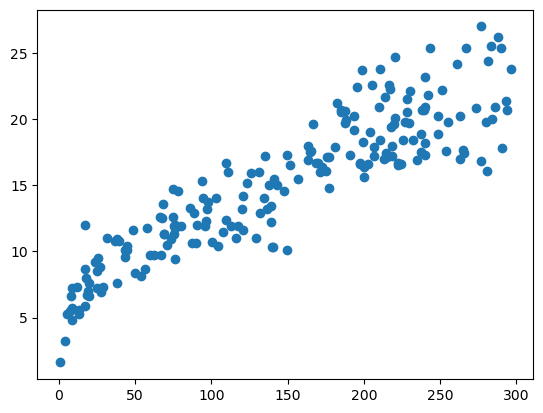

In [122]:
plt.scatter(df['TV'], df['Sales'])
plt.show()

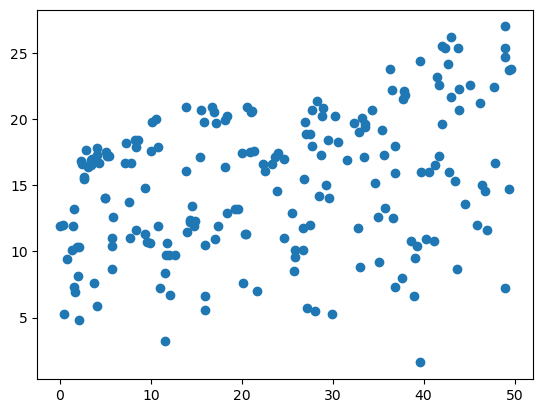

In [117]:
plt.scatter(df['Radio'], df['Sales'])
plt.show()

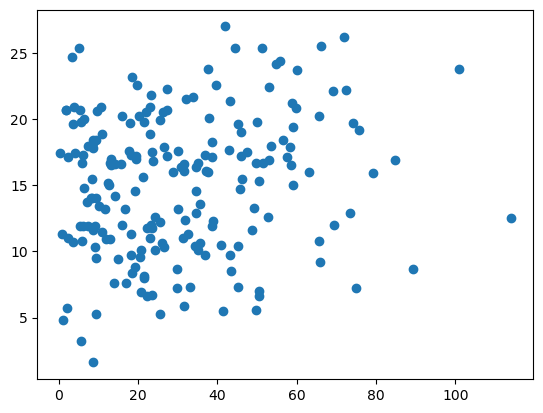

In [118]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.show()

In [119]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Ao analisar estes graficos e a tabela de correlação podemos ver que a variavel TV é a que mais tem influência sobre nossa variável alvo, Sales, a variavel Newspaper tem uma correlação muito baixo então não influenciaria tanto em nosso modelo de Machine Learning por isso utilizaremos apenas as variáveis TV e Radio como variáveis preditoras e a Sales como nossa variável alvo

# 5. Implementando Modelo de Regressão Linear

In [142]:
X = np.array(df[['TV', 'Radio']])
y = np.array(df['Sales'])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [144]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [145]:
model.score(X_test, y_test)

0.911516257151568

In [147]:
features = np.array([[230.1, 37.8]])
model.predict(features)

array([21.12960557])

### Neste teste do nosso modelo obtivemos 91,1% de acurácia, inserimos valores novos no modelo de acordo com as características que usamos para treiná-lo e prever quantas unidades do produto podem ser vendidas com base no valor gasto em sua publicidade em várias plataformas